In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
# Import Dataset
mobile=pd.read_csv('/content/myphonedata.csv')
mobile

,V1,V2,V3,red,white,green,yellow,orange,blue
0,red,white,green,1,1,1,0,0,0
1,white,orange,NaN,0,1,0,0,1,0
2,white,blue,NaN,0,1,0,0,0,1
3,red,white,orange,1,1,0,0,1,0
4,red,blue,NaN,1,0,0,0,0,1
5,white,blue,NaN,0,1,0,0,0,1
6,red,blue,NaN,1,0,0,0,0,1
7,red,white,blue,1,1,0,0,0,1
8,green,NaN,NaN,0,0,1,0,0,0
9,red,white,blue,1,1,0,0,0,1


In [3]:
mobile = mobile.iloc[:,3:]
mobile

,red,white,green,yellow,orange,blue
0,1,1,1,0,0,0
1,0,1,0,0,1,0
2,0,1,0,0,0,1
3,1,1,0,0,1,0
4,1,0,0,0,0,1
5,0,1,0,0,0,1
6,1,0,0,0,0,1
7,1,1,0,0,0,1
8,0,0,1,0,0,0
9,1,1,0,0,0,1


In [4]:
'''
Apriori Algorithm
1. Association rules with 10% Support and 70% confidence
'''

'\nApriori Algorithm\n1. Association rules with 10% Support and 70% confidence\n'

In [5]:
# With 10% Support
frequent_itemsets=apriori(mobile,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.545455,(red)
1,0.636364,(white)
2,0.181818,(green)
3,0.181818,(orange)
4,0.545455,(blue)
5,0.363636,"(white, red)"
6,0.363636,"(blue, red)"
7,0.181818,"(white, orange)"
8,0.363636,"(white, blue)"
9,0.181818,"(white, blue, red)"


In [6]:
# Most frequent itemsets based on support 
frequent_itemsets.sort_values('support', ascending = False, inplace = True)
frequent_itemsets

,support,itemsets
1,0.636364,(white)
0,0.545455,(red)
4,0.545455,(blue)
5,0.363636,"(white, red)"
6,0.363636,"(blue, red)"
8,0.363636,"(white, blue)"
2,0.181818,(green)
3,0.181818,(orange)
7,0.181818,"(white, orange)"
9,0.181818,"(white, blue, red)"


In [7]:
# with 70% confidence
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
1,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
2,(blue),(red),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
3,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
4,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
5,(blue),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
6,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
7,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
8,"(white, blue)",(red),0.363636,0.545455,0.181818,0.500000,0.916667,-0.016529,0.909091
9,"(white, red)",(blue),0.363636,0.545455,0.181818,0.500000,0.916667,-0.016529,0.909091


In [8]:
'''
 A leverage value of 0 indicates independence. Range will be [-1 1]
 A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

'''

'\n A leverage value of 0 indicates independence. Range will be [-1 1]\n A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]\n\n'

In [9]:
rules.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
7,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
2,(blue),(red),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
3,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
0,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
4,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
1,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
5,(blue),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
8,"(white, blue)",(red),0.363636,0.545455,0.181818,0.500000,0.916667,-0.016529,0.909091
9,"(white, red)",(blue),0.363636,0.545455,0.181818,0.500000,0.916667,-0.016529,0.909091


In [10]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
1,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
2,(blue),(red),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
3,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
4,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
5,(blue),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
6,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
7,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf


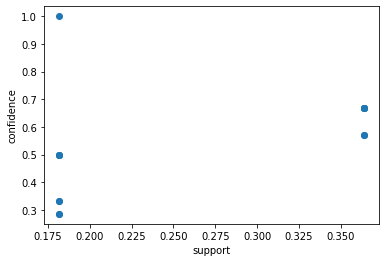

In [11]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

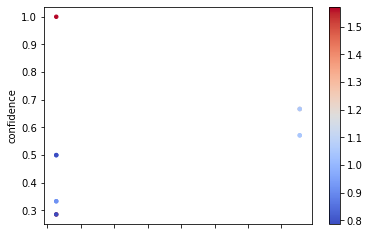

In [12]:
rules.plot(x = "support", y = "confidence", c = rules.lift, kind="scatter", s = 12, cmap = plt.cm.coolwarm)

In [13]:
# Association rules with 5% Support and 80% confidence

In [14]:
# With 5% Support
frequent_itmsets=apriori(mobile,min_support=0.05,use_colnames=True)
frequent_itmsets

,support,itemsets
0,0.545455,(red)
1,0.636364,(white)
2,0.181818,(green)
3,0.090909,(yellow)
4,0.181818,(orange)
5,0.545455,(blue)
6,0.363636,"(white, red)"
7,0.090909,"(green, red)"
8,0.090909,"(orange, red)"
9,0.363636,"(blue, red)"


In [15]:
# With 80% confidence
ruless=association_rules(frequent_itmsets,metric='lift',min_threshold=0.8)
ruless


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
1,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
2,(green),(red),0.181818,0.545455,0.090909,0.500000,0.916667,-0.008264,0.909091
3,(red),(green),0.545455,0.181818,0.090909,0.166667,0.916667,-0.008264,0.981818
4,(orange),(red),0.181818,0.545455,0.090909,0.500000,0.916667,-0.008264,0.909091
5,(red),(orange),0.545455,0.181818,0.090909,0.166667,0.916667,-0.008264,0.981818
6,(blue),(red),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
7,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
8,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
9,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf


In [16]:
ruless[ruless.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
1,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
6,(blue),(red),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
7,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
8,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
9,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
10,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
11,(blue),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
12,"(white, green)",(red),0.090909,0.545455,0.090909,1.000000,1.833333,0.041322,inf
13,"(white, red)",(green),0.363636,0.181818,0.090909,0.250000,1.375000,0.024793,1.090909


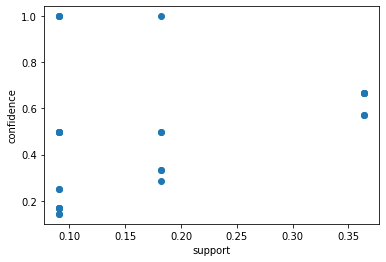

In [17]:
# visualization of obtained rule
plt.scatter(ruless['support'],ruless['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()